In [30]:
import numpy as np 
import pandas as pd
import seaborn 
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('heart.csv')
df = pd.DataFrame(data)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
df = df.rename(columns={'cp':'ChestPain','trestbps':'RestBP','chol':'Cholestoral','fbs':'Blood Sugar',
                        'restecg':'ECG','thalach':'MAXHeartRate','exang':'ExerciseAngina','ca':'MajorVessels','target':'Target'})
df

,age,sex,ChestPain,RestBP,Cholestoral,Blood Sugar,ECG,MAXHeartRate,ExerciseAngina,oldpeak,slope,MajorVessels,thal,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [9]:
df.isnull().values.any()

False

In [27]:
df['Target'].value_counts()

1    165
0    138
Name: Target, dtype: int64

<AxesSubplot:xlabel='Target', ylabel='count'>

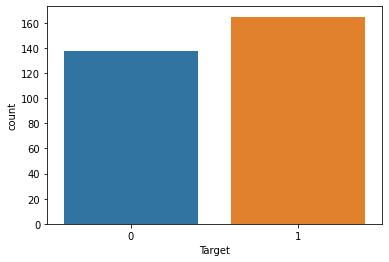

In [34]:
seaborn.countplot(x = df['Target'])

<AxesSubplot:xlabel='age', ylabel='count'>

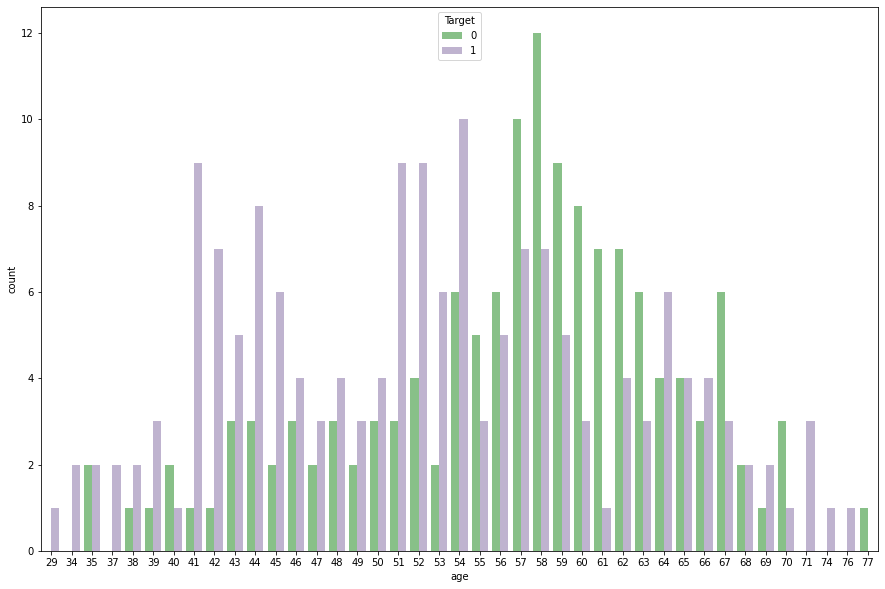

In [32]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='age', hue='Target',data=df,palette= 'Accent',ax=ax)

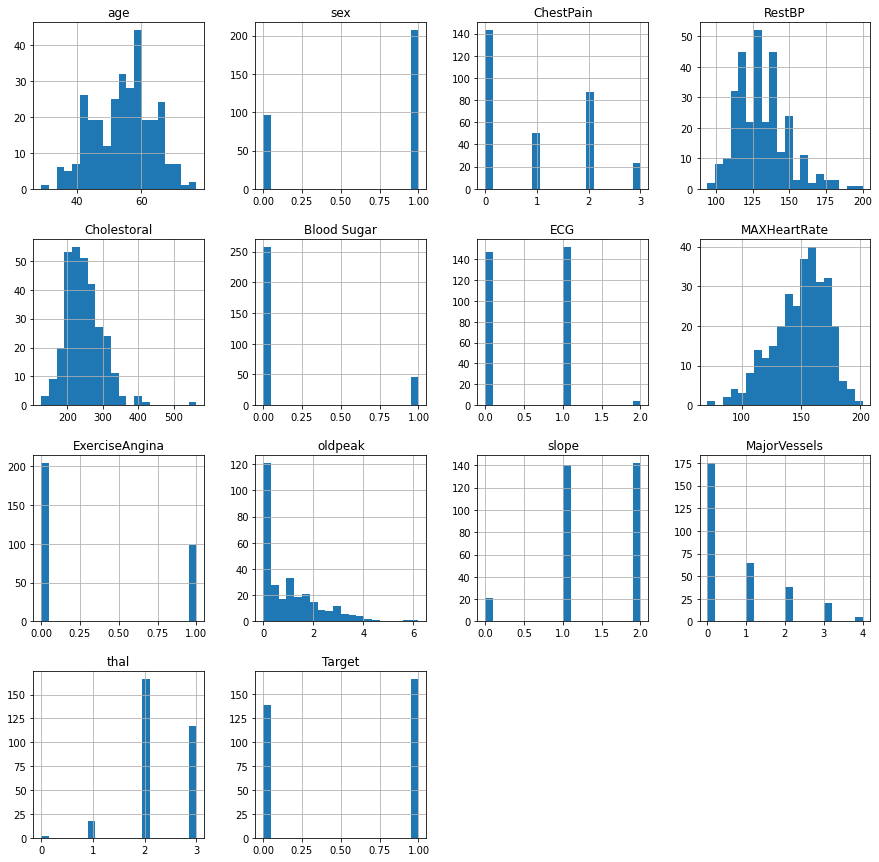

In [36]:
df.hist(bins=20,figsize=(15,15))
plt.show()

<AxesSubplot:>

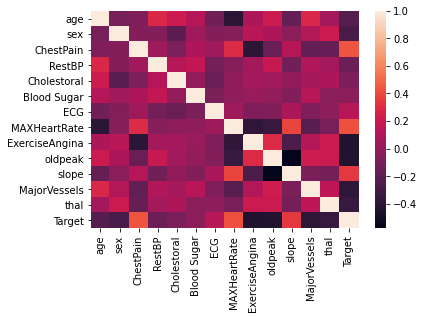

In [37]:
sns.heatmap(df.corr())

In [38]:
X = df.drop(['Target'],axis = 1)
y = df.Target.values
X,y

(     age  sex  ChestPain  RestBP  Cholestoral  Blood Sugar  ECG  MAXHeartRate  \
 0     63    1          3     145          233            1    0           150   
 1     37    1          2     130          250            0    1           187   
 2     41    0          1     130          204            0    0           172   
 3     56    1          1     120          236            0    1           178   
 4     57    0          0     120          354            0    1           163   
 ..   ...  ...        ...     ...          ...          ...  ...           ...   
 298   57    0          0     140          241            0    1           123   
 299   45    1          3     110          264            0    1           132   
 300   68    1          0     144          193            1    1           141   
 301   57    1          0     130          131            0    1           115   
 302   57    0          1     130          236            0    0           174   
 
      Exercise

In [42]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=5)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((257, 13), (46, 13), (257,), (46,))

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score

logre = LogisticRegression()
logre.fit(X_train,y_train)

LogisticRegression()

In [46]:
y_pred = logre.predict(X_test)
actual = []
predcition = []

for i,j in zip(y_test,y_pred):
  actual.append(i)
  predcition.append(j) 

dic = {'Actual':actual,
       'Prediction':predcition
       }

result  = pd.DataFrame(dic)
result

,Actual,Prediction
0,0,1
1,0,0
2,0,0
3,0,0
4,1,1
5,0,0
6,1,1
7,0,0
8,1,1
9,1,1


In [47]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.9130434782608695


In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        22
           1       0.92      0.92      0.92        24

    accuracy                           0.91        46
   macro avg       0.91      0.91      0.91        46
weighted avg       0.91      0.91      0.91        46



[[20  2]
 [ 2 22]]


<AxesSubplot:>

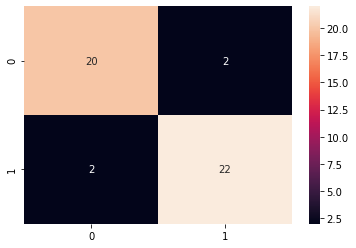

In [49]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [50]:
import sklearn
sklearn.metrics.roc_auc_score(y_test,y_pred)

0.9128787878787877